In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import manifold


In [6]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data

In [11]:
targets = targets.astype(int)

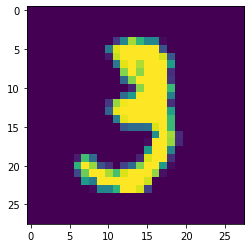

In [13]:
single_image = pixel_values[10,:].reshape(28,28)
plt.imshow(single_image)
plt.show()

In [14]:
tsne = manifold.TSNE(random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:30000,:])

In [33]:
tsne_data = pd.DataFrame(np.column_stack((transformed_data,targets[:30000])), columns=['x1','x2','target'])

In [34]:
tsne_data

,x1,x2,target
0,-1.325699,-48.172878,5.0
1,57.591206,1.884732,0.0
2,-5.279769,64.382004,4.0
3,-0.494590,13.073107,1.0
4,-28.104515,31.623167,9.0
...,...,...,...
29995,-21.908644,-11.415271,8.0
29996,-32.224033,42.116989,9.0
29997,-32.855961,-54.930031,6.0
29998,-52.350243,23.881216,7.0


In [37]:
tsne_data['target'] = tsne_data['target'].astype(int)

In [70]:
#%matplotlib inline
#%matplotlib notebook
#%matplotlib ipympl

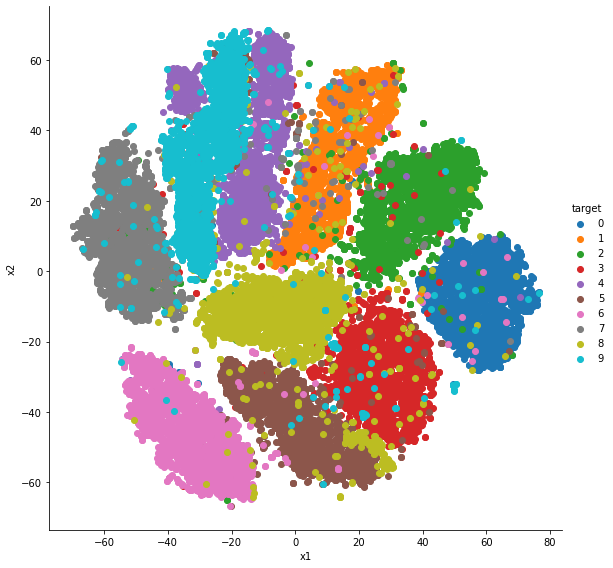

In [71]:
grid = sns.FacetGrid(tsne_data, hue='target', size=8)
grid.map(plt.scatter,'x1','x2').add_legend()
plt.show()